In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
df = pd.read_csv("hex.csv", sep= ';')
df

,DATA,TOTAL_DEVIDO,ESTADO,PRODUTO
0,2011-05-31 00:00:00.000,"R$ 23.153,23",17,"Mountain-100 Black, 42"
1,2011-05-31 00:00:00.000,"R$ 23.153,23",17,"Mountain-100 Black, 44"
2,2011-05-31 00:00:00.000,"R$ 23.153,23",17,"Mountain-100 Black, 48"
3,2011-05-31 00:00:00.000,"R$ 23.153,23",17,"Mountain-100 Silver, 38"
4,2011-05-31 00:00:00.000,"R$ 23.153,23",17,"Mountain-100 Silver, 42"
...,...,...,...,...
121312,2014-06-30 00:00:00.000,"R$ 34,22",7,Fender Set - Mountain
121313,2014-06-30 00:00:00.000,"R$ 34,22",7,AWC Logo Cap
121314,2014-06-30 00:00:00.000,"R$ 209,92",7,Fender Set - Mountain
121315,2014-06-30 00:00:00.000,"R$ 209,92",7,All-Purpose Bike Stand


In [5]:
df
for coluna in df.columns:
    print(f"Coluna: {coluna}, Tipo de dados: {df[coluna].dtypes}")

Coluna: DATA, Tipo de dados: object
Coluna: TOTAL_DEVIDO, Tipo de dados: object
Coluna: ESTADO, Tipo de dados: int64
Coluna: PRODUTO, Tipo de dados: object


In [6]:
#Formatando data
df['DATA'] = pd.to_datetime(df['DATA'])

In [7]:

print(df['DATA'].dtypes)

datetime64[ns]


In [8]:
# Agrupar vendas totais por região e produto
vendas_por_regiao_produto = df.groupby(['ESTADO', 'PRODUTO'])['TOTAL_DEVIDO'].sum().reset_index()

In [9]:
# Agrupar vendas totais por ano e mês
df['ANO'] = df['DATA'].dt.year
df['MES'] = df['DATA'].dt.month_name()  # Nome do mês
vendas_por_periodo = df.groupby(['ANO', 'MES'])['TOTAL_DEVIDO'].sum().reset_index()

In [10]:
# Função para filtrar por intervalo de datas
def filtrar_por_data(df, data_inicial, data_final):
    return df[(df['DATA'] >= data_inicial) & (df['DATA'] <= data_final)]

In [11]:
# Função para filtrar por produto
def filtrar_por_produto(df, produtos):
    return df[df['PRODUTO'].isin(produtos)]

In [12]:
# Função para filtrar por região
def filtrar_por_regiao(df, regioes):
    return df[df['ESTADO'].isin(regioes)]

In [13]:
# Exemplo de uso dos filtros
# Filtros
data_inicial = '2011-01-01'
data_final = '2014-12-31'
produtos_selecionados = ['Mountain-100 Black, 42', 'AWC Logo Cap']
regioes_selecionadas = [7, 17]
print(df)

             DATA  TOTAL_DEVIDO  ESTADO                  PRODUTO   ANO   MES
0      2011-05-31  R$ 23.153,23      17   Mountain-100 Black, 42  2011   May
1      2011-05-31  R$ 23.153,23      17   Mountain-100 Black, 44  2011   May
2      2011-05-31  R$ 23.153,23      17   Mountain-100 Black, 48  2011   May
3      2011-05-31  R$ 23.153,23      17  Mountain-100 Silver, 38  2011   May
4      2011-05-31  R$ 23.153,23      17  Mountain-100 Silver, 42  2011   May
...           ...           ...     ...                      ...   ...   ...
121312 2014-06-30      R$ 34,22       7    Fender Set - Mountain  2014  June
121313 2014-06-30      R$ 34,22       7             AWC Logo Cap  2014  June
121314 2014-06-30     R$ 209,92       7    Fender Set - Mountain  2014  June
121315 2014-06-30     R$ 209,92       7   All-Purpose Bike Stand  2014  June
121316 2014-06-30     R$ 209,92       7             AWC Logo Cap  2014  June

[121317 rows x 6 columns]


In [14]:
# Filtrar os dados com base nos critérios
dados_filtrados = filtrar_por_data(df, data_inicial, data_final)
dados_filtrados = filtrar_por_produto(dados_filtrados, produtos_selecionados)
dados_filtrados = filtrar_por_regiao(dados_filtrados, regioes_selecionadas)

In [15]:
# Agrupando os dados filtrados por região e produto
vendas_filtradas_por_regiao_produto = dados_filtrados.groupby(['ESTADO', 'PRODUTO'])['TOTAL_DEVIDO'].sum().reset_index()
# Agrupando os dados filtrados por ano e mês
vendas_filtradas_por_periodo = dados_filtrados.groupby(['ANO', 'MES'])['TOTAL_DEVIDO'].sum().reset_index()


In [16]:
# Exibir resultados
print("Vendas por Região e Produto:")
print(vendas_por_regiao_produto)

print("\nVendas por Ano e Mês:")
print(vendas_por_periodo)

print("\nVendas Filtradas por Região e Produto:")
print(vendas_filtradas_por_regiao_produto)

print("\nVendas Filtradas por Ano e Mês:")
print(vendas_filtradas_por_periodo)

print (df)

Vendas por Região e Produto:
      ESTADO                     PRODUTO  \
0          1                AWC Logo Cap   
1          1       Bike Wash - Dissolver   
2          1                  Cable Lock   
3          1                       Chain   
4          1             Classic Vest, L   
...      ...                         ...   
9674     181  Women's Mountain Shorts, M   
9675     181  Women's Mountain Shorts, S   
9676     181           Women's Tights, L   
9677     181           Women's Tights, M   
9678     181           Women's Tights, S   

                                           TOTAL_DEVIDO  
0     R$ 104.478,56R$ 21.997,79R$ 37.379,22R$ 3.129,...  
1     R$ 111.207,22R$ 49.695,36R$ 10.961,14R$ 4.419,...  
2     R$ 104.478,56R$ 37.379,22R$ 75.161,88R$ 88.289,66  
3     R$ 111.207,22R$ 87.150,11R$ 4.150,56R$ 57.796,...  
4                                           R$ 4.049,51  
...                                                 ...  
9674               R$ 53.390,70R$ 56

In [17]:
# Supondo que 'df' seja seu DataFrame e já tenha as colunas necessárias.
df['DATA'] = pd.to_datetime(df['DATA'])

# Agrupar vendas totais por produto
vendas_por_produto = df.groupby('PRODUTO')['TOTAL_DEVIDO'].sum().reset_index()

# Agrupar vendas totais por período (ano e mês)
df['ANO_MES'] = df['DATA'].dt.to_period('M')  # Criar uma coluna ano-mês
vendas_por_tempo = df.groupby('ANO_MES')['TOTAL_DEVIDO'].sum().reset_index()

In [18]:
print(df)

             DATA  TOTAL_DEVIDO  ESTADO                  PRODUTO   ANO   MES  \
0      2011-05-31  R$ 23.153,23      17   Mountain-100 Black, 42  2011   May   
1      2011-05-31  R$ 23.153,23      17   Mountain-100 Black, 44  2011   May   
2      2011-05-31  R$ 23.153,23      17   Mountain-100 Black, 48  2011   May   
3      2011-05-31  R$ 23.153,23      17  Mountain-100 Silver, 38  2011   May   
4      2011-05-31  R$ 23.153,23      17  Mountain-100 Silver, 42  2011   May   
...           ...           ...     ...                      ...   ...   ...   
121312 2014-06-30      R$ 34,22       7    Fender Set - Mountain  2014  June   
121313 2014-06-30      R$ 34,22       7             AWC Logo Cap  2014  June   
121314 2014-06-30     R$ 209,92       7    Fender Set - Mountain  2014  June   
121315 2014-06-30     R$ 209,92       7   All-Purpose Bike Stand  2014  June   
121316 2014-06-30     R$ 209,92       7             AWC Logo Cap  2014  June   

        ANO_MES  
0       2011-05  
1  

In [19]:
import matplotlib.ticker as mtick

In [20]:
# Agrupamento por Trimestre
df['ANO_TRIMESTRE'] = df['DATA'].dt.to_period('Q')  # Criar uma coluna de ano e trimestre
vendas_por_trimestre = df.groupby('ANO_TRIMESTRE')['TOTAL_DEVIDO'].sum().reset_index()

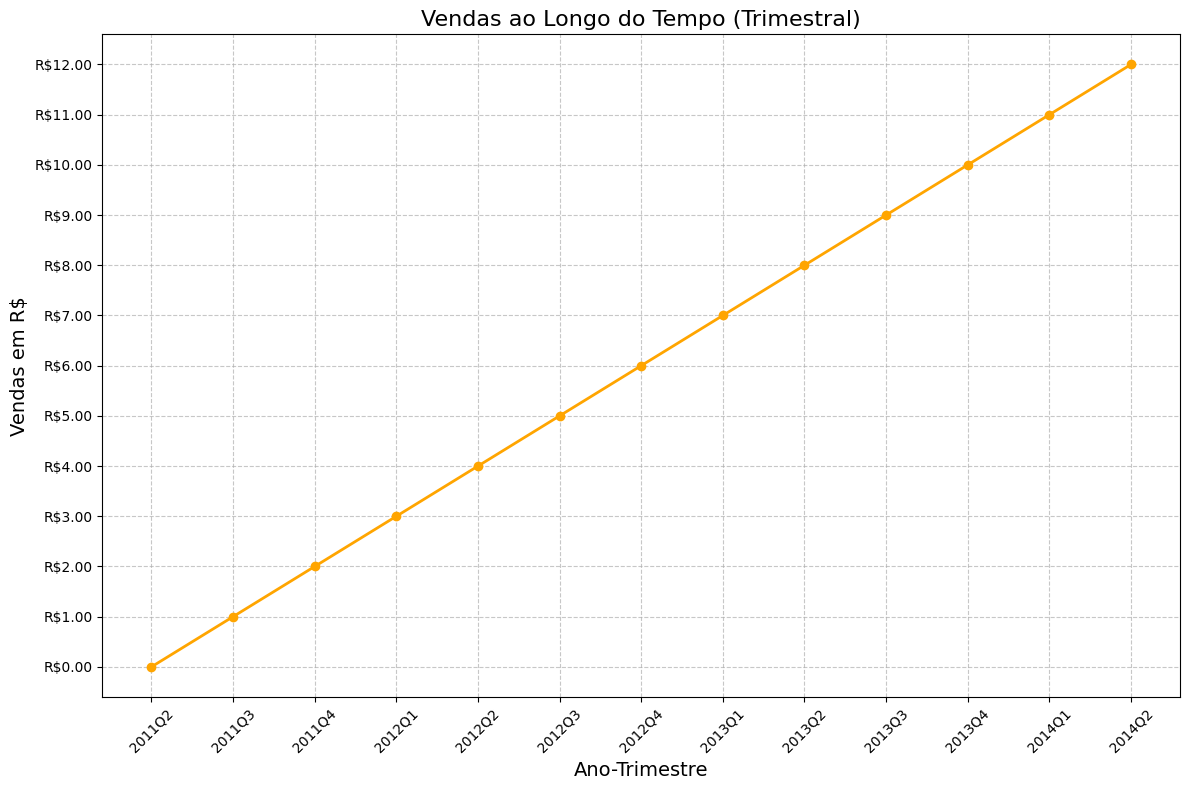

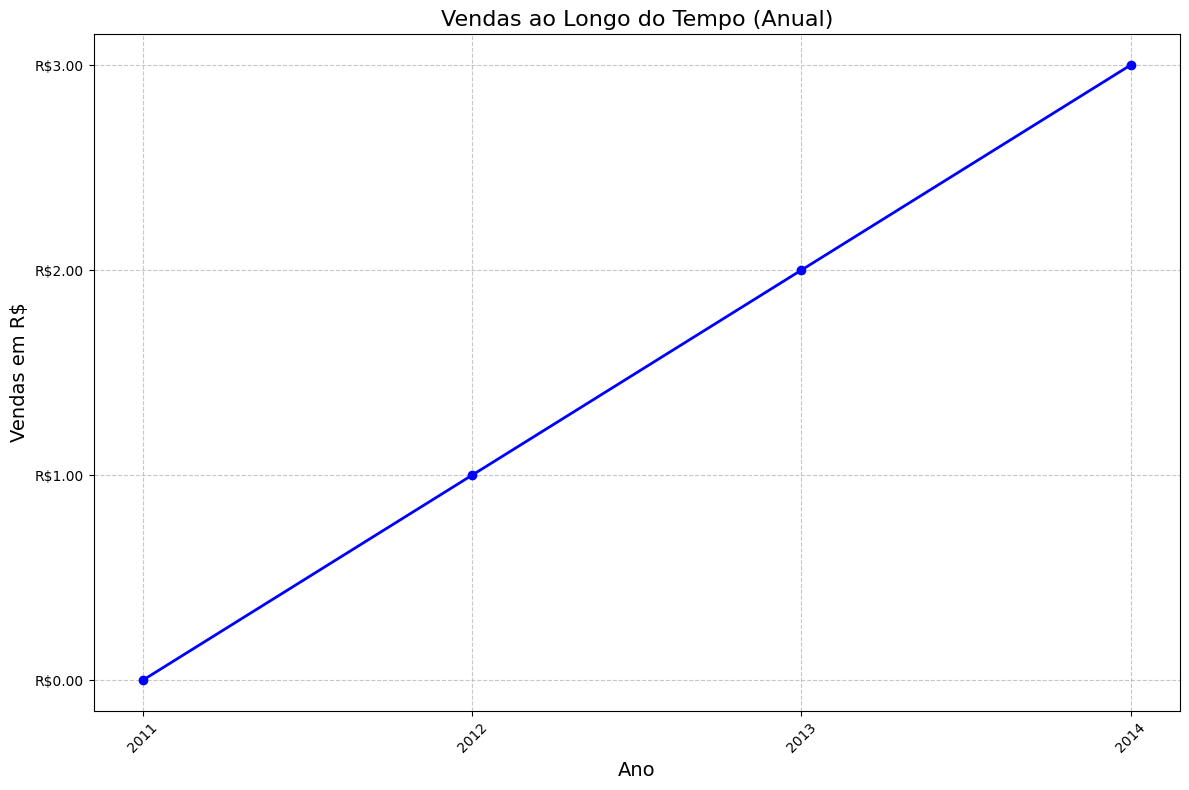

In [21]:
# Visualização: Gráfico de Linhas - Vendas ao Longo do Tempo (Trimestral)
plt.figure(figsize=(12, 8))
plt.plot(vendas_por_trimestre['ANO_TRIMESTRE'].astype(str), vendas_por_trimestre['TOTAL_DEVIDO'], 
         marker='o', color='orange', linestyle='-', linewidth=2)

plt.title('Vendas ao Longo do Tempo (Trimestral)', fontsize=16)
plt.xlabel('Ano-Trimestre', fontsize=14)
plt.ylabel('Vendas em R$', fontsize=14)

# Formatar o eixo Y como moeda
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))

# Melhorando o formato do eixo x
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Agrupamento por Ano
df['ANO'] = df['DATA'].dt.to_period('Y')  # Criar uma coluna de ano
vendas_por_ano = df.groupby('ANO')['TOTAL_DEVIDO'].sum().reset_index()

# Visualização: Gráfico de Linhas - Vendas ao Longo do Tempo (Anual)
plt.figure(figsize=(12, 8))
plt.plot(vendas_por_ano['ANO'].astype(str), vendas_por_ano['TOTAL_DEVIDO'], 
         marker='o', color='blue', linestyle='-', linewidth=2)

plt.title('Vendas ao Longo do Tempo (Anual)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Vendas em R$', fontsize=14)

# Formatar o eixo Y como moeda
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))

# Melhorando o formato do eixo x
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

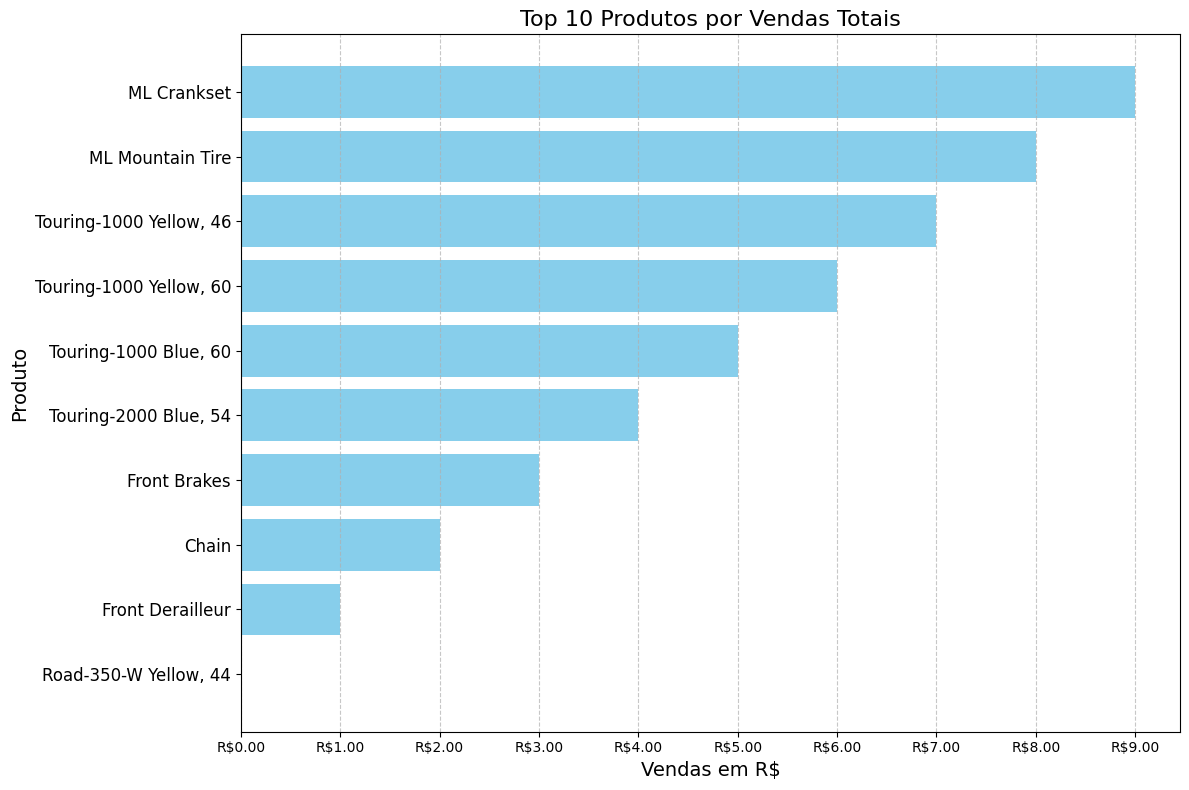

In [22]:
# Supondo que 'df' seja o DataFrame já contendo as colunas necessárias.
df['DATA'] = pd.to_datetime(df['DATA'])

# Agrupamento de vendas por produto
vendas_por_produto = df.groupby('PRODUTO')['TOTAL_DEVIDO'].sum().reset_index()

# Ordenando do maior para o menor e exibindo apenas os 10 produtos com mais vendas
vendas_por_produto = vendas_por_produto.sort_values(by='TOTAL_DEVIDO', ascending=False).head(10)

# Visualização: Gráfico de Barras - Vendas por Produto
plt.figure(figsize=(12, 8))  # Tamanho ajustado para legibilidade
plt.barh(vendas_por_produto['PRODUTO'], vendas_por_produto['TOTAL_DEVIDO'], color='skyblue')
plt.title('Top 10 Produtos por Vendas Totais', fontsize=16)
plt.xlabel('Vendas em R$', fontsize=14)
plt.ylabel('Produto', fontsize=14)

# Formatação do eixo X como moeda
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))

# Exibir apenas rótulos selecionados no eixo Y
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\xrodr\AppData\Local\Temp\ipykernel_4748\1881370082.py:10: SyntaxWarning: invalid escape sequence '\$'
  df['TOTAL_DEVIDO'] = df['TOTAL_DEVIDO'].replace({'R\$': '', ',': ''}, regex=True)  # Remover 'R$' e vírgulas
2024-10-23 19:00:58.030 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:00:58.254 
  command:

    streamlit run C:\Users\xrodr\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-23 19:00:58.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:00:58.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:00:58.257 Thread 'MainThread': missing ScriptRunContext! This warnin

DeltaGenerator()

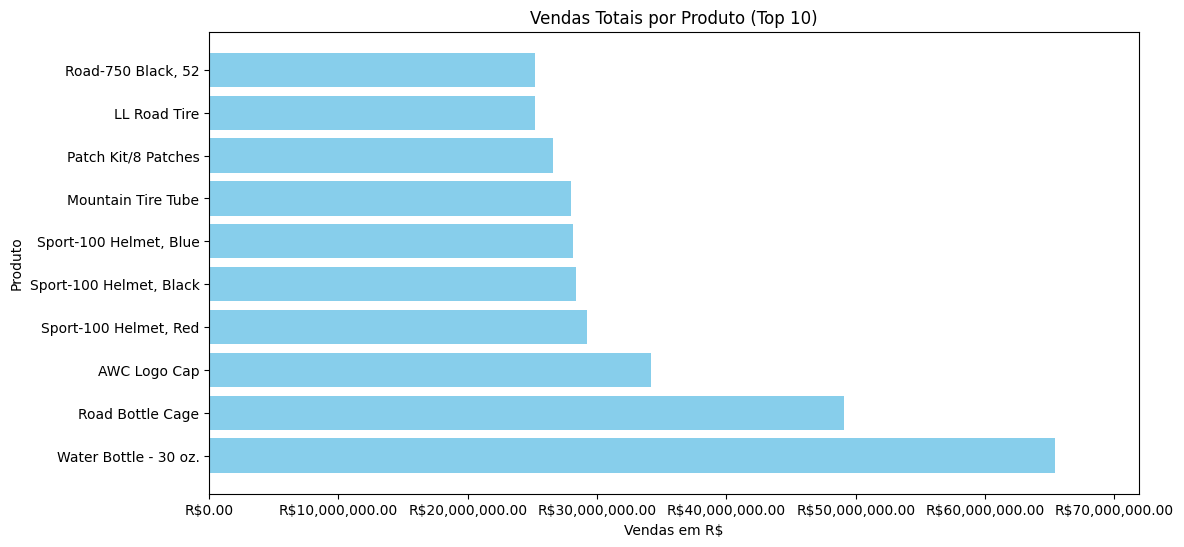

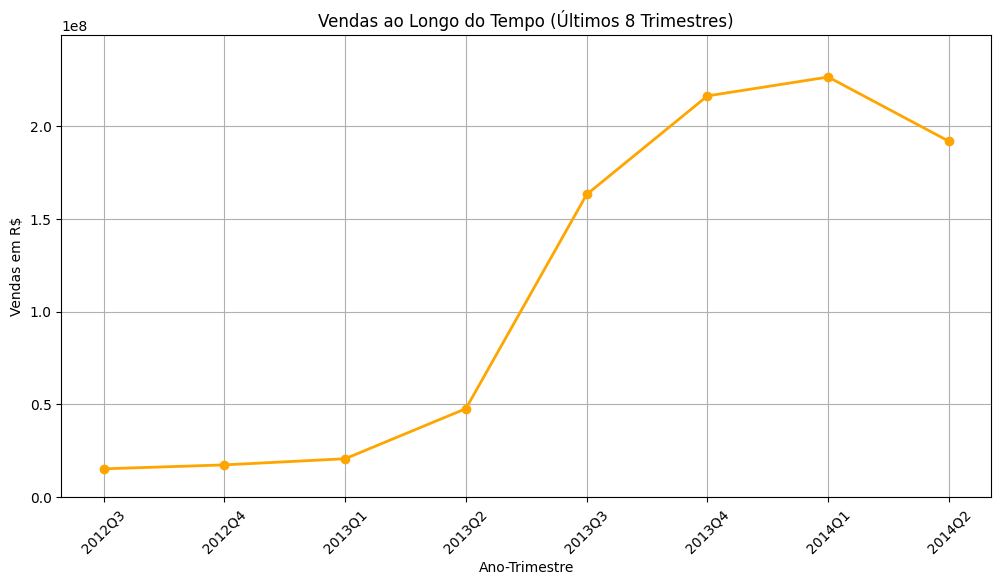

In [23]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Supondo que 'df' seja o DataFrame com os dados de vendas
df['DATA'] = pd.to_datetime(df['DATA'])

# Converter 'TOTAL_DEVIDO' para numérico
df['TOTAL_DEVIDO'] = df['TOTAL_DEVIDO'].replace({'R\$': '', ',': ''}, regex=True)  # Remover 'R$' e vírgulas
df['TOTAL_DEVIDO'] = pd.to_numeric(df['TOTAL_DEVIDO'], errors='coerce')  # Converter para float

# Sidebar com os filtros de período, produto e região
st.sidebar.header("Filtros")

# Filtro de data
data_inicial = st.sidebar.date_input("Data Inicial", df['DATA'].min().date())
data_final = st.sidebar.date_input("Data Final", df['DATA'].max().date())

# Filtro de produto
produtos = df['PRODUTO'].unique()
produtos_selecionados = st.sidebar.multiselect("Selecionar Produto(s)", produtos, default=produtos)

# Filtro de região
regioes = df['ESTADO'].unique()
regioes_selecionadas = st.sidebar.multiselect("Selecionar Região(ões)", regioes, default=regioes)

# Filtrar o DataFrame baseado nos filtros selecionados
df_filtrado = df[(df['DATA'].dt.date >= data_inicial) & (df['DATA'].dt.date <= data_final)]
df_filtrado = df_filtrado[df_filtrado['PRODUTO'].isin(produtos_selecionados)]
df_filtrado = df_filtrado[df_filtrado['ESTADO'].isin(regioes_selecionadas)]

# KPI: Vendas Totais no Período Filtrado
vendas_totais = df_filtrado['TOTAL_DEVIDO'].sum()
st.metric("Vendas Totais no Período", f"R${vendas_totais:,.2f}")

# Visualização 1: Gráfico de Barras - Vendas por Produto
st.subheader("Vendas Totais por Produto (Top 10)")
vendas_por_produto = df_filtrado.groupby('PRODUTO')['TOTAL_DEVIDO'].sum().reset_index()
vendas_por_produto = vendas_por_produto.sort_values(by='TOTAL_DEVIDO', ascending=False).head(10)  # Limitar aos top 10

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(vendas_por_produto['PRODUTO'], vendas_por_produto['TOTAL_DEVIDO'], color='skyblue')
ax.set_xlabel('Vendas em R$')
ax.set_ylabel('Produto')
ax.set_title('Vendas Totais por Produto (Top 10)')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))
ax.set_xlim(0, vendas_por_produto['TOTAL_DEVIDO'].max() * 1.1)  # Limitar o eixo x com um buffer
st.pyplot(fig)

# Visualização 2: Gráfico de Linhas - Vendas ao Longo do Tempo (Trimestral)
st.subheader("Vendas ao Longo do Tempo (Trimestral)")
df_filtrado['ANO_TRIMESTRE'] = df_filtrado['DATA'].dt.to_period('Q')
vendas_por_trimestre = df_filtrado.groupby('ANO_TRIMESTRE')['TOTAL_DEVIDO'].sum().reset_index()

# Limitar para os últimos 8 trimestres
vendas_por_trimestre = vendas_por_trimestre.sort_values(by='ANO_TRIMESTRE', ascending=False).head(8).sort_values(by='ANO_TRIMESTRE')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(vendas_por_trimestre['ANO_TRIMESTRE'].astype(str), vendas_por_trimestre['TOTAL_DEVIDO'], 
        marker='o', color='orange', linestyle='-', linewidth=2)
ax.set_xlabel('Ano-Trimestre')
ax.set_ylabel('Vendas em R$')
ax.set_title('Vendas ao Longo do Tempo (Últimos 8 Trimestres)')
ax.grid(True)
plt.xticks(rotation=45)
ax.set_ylim(0, vendas_por_trimestre['TOTAL_DEVIDO'].max() * 1.1)  # Limitar o eixo y com um buffer
st.pyplot(fig)


In [26]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Supondo que 'df' seja o DataFrame com os dados de vendas
df = pd.DataFrame({
    'DATA': ['2023-01-15', '2023-02-20', '2023-03-10', '2023-04-25', '2023-05-05'],
    'PRODUTO': ['Produto A', 'Produto B', 'Produto A', 'Produto C', 'Produto B'],
    'TOTAL_DEVIDO': ['R$1.000,00', 'R$2.500,00', 'R$1.200,00', 'R$3.300,00', 'R$2.000,00'],
    'ESTADO': ['SP', 'SP', 'RJ', 'RJ', 'SP']
})

# Conversão da coluna de data e valor
df['DATA'] = pd.to_datetime(df['DATA'])
df['TOTAL_DEVIDO'] = df['TOTAL_DEVIDO'].replace({'R\$': '', ',': ''}, regex=True).astype(float)

# Sidebar com os filtros de período, produto e região
st.sidebar.header("Filtros")

# Filtro de data
data_inicial = st.sidebar.date_input("Data Inicial", df['DATA'].min().date())
data_final = st.sidebar.date_input("Data Final", df['DATA'].max().date())

# Filtro de produto
produtos = df['PRODUTO'].unique()
produtos_selecionados = st.sidebar.multiselect("Selecionar Produto(s)", produtos, default=produtos)

# Filtro de região
regioes = df['ESTADO'].unique()
regioes_selecionadas = st.sidebar.multiselect("Selecionar Região(ões)", regioes, default=regioes)

# Filtrar o DataFrame baseado nos filtros selecionados
df_filtrado = df[(df['DATA'].dt.date >= data_inicial) & (df['DATA'].dt.date <= data_final)]
df_filtrado = df_filtrado[df_filtrado['PRODUTO'].isin(produtos_selecionados)]
df_filtrado = df_filtrado[df_filtrado['ESTADO'].isin(regioes_selecionadas)]

# KPI: Vendas Totais no Período Filtrado
vendas_totais = df_filtrado['TOTAL_DEVIDO'].sum()
st.metric("Vendas Totais no Período", f"R${vendas_totais:,.2f}")

# Visualização 1: Gráfico de Barras - Vendas por Produto
st.subheader("Vendas Totais por Produto (Top 10)")
vendas_por_produto = df_filtrado.groupby('PRODUTO')['TOTAL_DEVIDO'].sum().reset_index()
vendas_por_produto = vendas_por_produto.sort_values(by='TOTAL_DEVIDO', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(vendas_por_produto['PRODUTO'], vendas_por_produto['TOTAL_DEVIDO'], color='skyblue')
ax.set_xlabel('Vendas em R$')
ax.set_ylabel('Produto')
ax.set_title('Vendas Totais por Produto (Top 10)')
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))
ax.set_xlim(0, vendas_por_produto['TOTAL_DEVIDO'].max() * 1.1)  # Limitar o eixo x com um buffer
st.pyplot(fig)

# Visualização 2: Gráfico de Linhas - Vendas ao Longo do Tempo (Trimestral)
st.subheader("Vendas ao Longo do Tempo (Trimestral)")
df_filtrado['ANO_TRIMESTRE'] = df_filtrado['DATA'].dt.to_period('Q')
vendas_por_trimestre = df_filtrado.groupby('ANO_TRIMESTRE')['TOTAL_DEVIDO'].sum().reset_index()

# Limitar para os últimos 8 trimestres
vendas_por_trimestre = vendas_por_trimestre.sort_values(by='ANO_TRIMESTRE', ascending=False).head(8).sort_values(by='ANO_TRIMESTRE')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(vendas_por_trimestre['ANO_TRIMESTRE'].astype(str), vendas_por_trimestre['TOTAL_DEVIDO'], 
        marker='o', color='orange', linestyle='-', linewidth=2)
ax.set_xlabel('Ano-Trimestre')
ax.set_ylabel('Vendas em R$')
ax.set_title('Vendas ao Longo do Tempo (Últimos 8 Trimestres)')
ax.grid(True)
plt.xticks(rotation=45)
ax.set_ylim(0, vendas_por_trimestre['TOTAL_DEVIDO'].max() * 1.1)  # Limitar o eixo y com um buffer
st.pyplot(fig)


<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
C:\Users\xrodr\AppData\Local\Temp\ipykernel_4748\1311779821.py:16: SyntaxWarning: invalid escape sequence '\$'
  df['TOTAL_DEVIDO'] = df['TOTAL_DEVIDO'].replace({'R\$': '', ',': ''}, regex=True).astype(float)
2024-10-23 19:02:05.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:05.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:05.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:05.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:05.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:05.810 Thread 'MainThread': missing Script

DeltaGenerator()